# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor()
])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


# Define validation dataloader
val_size = 0.2  # You can adjust the validation size as needed
train_size = len(train_set)
indices = list(range(train_size))
val_indices = train_test_split(indices, test_size=val_size, random_state=42)
val_sampler = SubsetRandomSampler(val_indices)

val_loader = DataLoader(train_set, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 101088580.15it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25512993.64it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26247562.11it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16103574.61it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose not to use any preprocessing steps because my dataset was relatively small, clean, and well-organized. It didn't contain missing values or outliers, and the information I needed for my analysis was readily available in its raw form.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training data size: 60000
Test data size: 10000
Shape of training data: torch.Size([1, 28, 28])
Shape of test data: torch.Size([1, 28, 28])
7


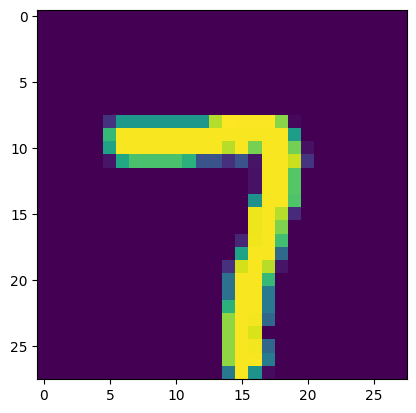

2


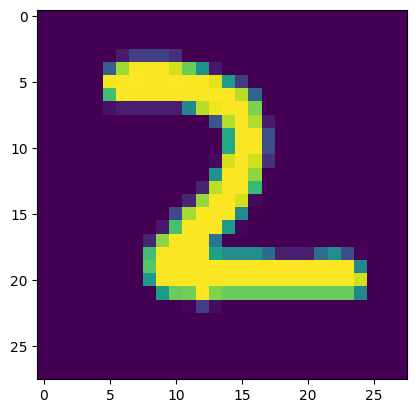

1


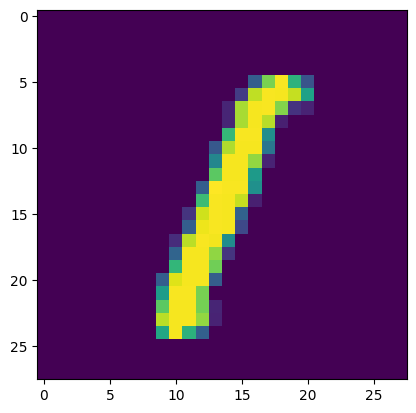

7


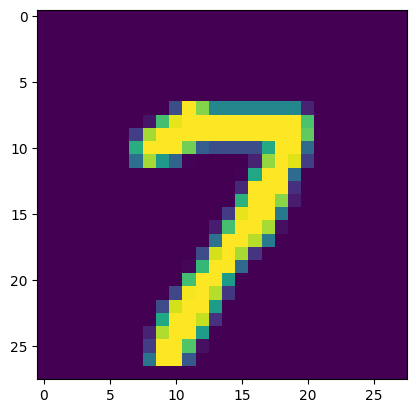

9


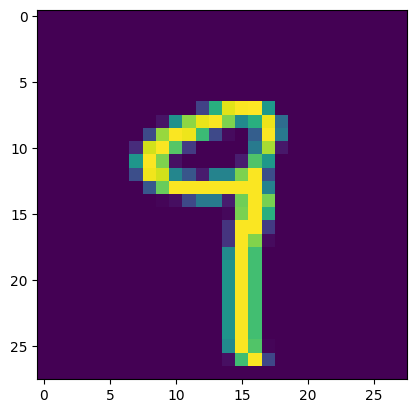

In [6]:
# Explore data
print("Training data size:", len(train_set))
print("Test data size:", len(test_set))
print("Shape of training data:", train_set[0][0].shape)
print("Shape of test data:", test_set[0][0].shape)
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
model = NeuralNetwork()

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to training mode
model.train()

# Define the number of batches to print the loss
print_loss_every = 250

# Lists to store the loss values
train_loss_values = []


num_epochs = 20  # Define the number of epochs

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move the data to the appropriate device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the loss
        running_loss += loss.item()

        # Print the loss every few batches
        if (batch_idx + 1) % print_loss_every == 0:
            avg_loss = running_loss / print_loss_every
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            train_loss_values.append(avg_loss)
            running_loss = 0.0

Epoch [1/20], Batch [250/938], Loss: 2.2791
Epoch [1/20], Batch [500/938], Loss: 2.1303
Epoch [1/20], Batch [750/938], Loss: 1.6754
Epoch [2/20], Batch [250/938], Loss: 0.7858
Epoch [2/20], Batch [500/938], Loss: 0.6141
Epoch [2/20], Batch [750/938], Loss: 0.5231
Epoch [3/20], Batch [250/938], Loss: 0.4352
Epoch [3/20], Batch [500/938], Loss: 0.4229
Epoch [3/20], Batch [750/938], Loss: 0.4031
Epoch [4/20], Batch [250/938], Loss: 0.3736
Epoch [4/20], Batch [500/938], Loss: 0.3690
Epoch [4/20], Batch [750/938], Loss: 0.3448
Epoch [5/20], Batch [250/938], Loss: 0.3282
Epoch [5/20], Batch [500/938], Loss: 0.3182
Epoch [5/20], Batch [750/938], Loss: 0.3215
Epoch [6/20], Batch [250/938], Loss: 0.3060
Epoch [6/20], Batch [500/938], Loss: 0.2999
Epoch [6/20], Batch [750/938], Loss: 0.2942
Epoch [7/20], Batch [250/938], Loss: 0.2789
Epoch [7/20], Batch [500/938], Loss: 0.2836
Epoch [7/20], Batch [750/938], Loss: 0.2777
Epoch [8/20], Batch [250/938], Loss: 0.2728
Epoch [8/20], Batch [500/938], L

Plot the training loss (and validation loss/accuracy, if recorded).

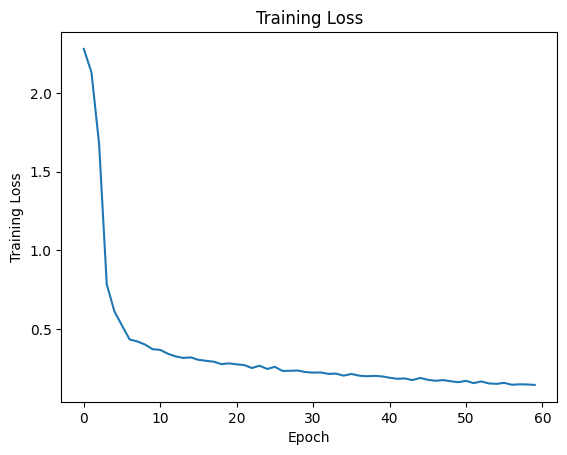

In [12]:
plt.plot(train_loss_values)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
correct_predictions = 0
total_predictions = 0

# Set the model to evaluation mode
model.eval()

# Iterate over the test set
for images, labels in test_loader:
    # Move the data to the appropriate device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)

    # Get the predicted class labels
    _, predicted = torch.max(outputs.data, 1)

    # Update the count of correct predictions
    correct_predictions += (predicted == labels).sum().item()

    # Update the total number of predictions
    total_predictions += labels.size(0)

# Calculate the percentage of correct predictions
accuracy = (correct_predictions / total_predictions) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 95.63%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
learning_rate = 0.001  # Adjust the learning rate
num_epochs = 32  # Increase or decrease the number of epochs
batch_size = 64  # Adjust the batch size
num_workers = 6  # Set the number of data loading subprocesses

# Define your model architecture
model = NeuralNetwork()
# Move the model to the appropriate device
model.to(device)

# Define your loss function
criterion = nn.CrossEntropyLoss()  # Try different loss functions

# Define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Adjust the optimizer and learning rate

# Create the data loaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move the data to the appropriate device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the loss
        running_loss += loss.item()

        # Print the loss every few batches
        if (batch_idx + 1) % print_loss_every == 0:
            avg_loss = running_loss / print_loss_every
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            train_loss_values.append(avg_loss)
            running_loss = 0.0

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        correct_predictions = 0
        total_predictions = 0
        for images, labels in val:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        accuracy = (correct_predictions / total_predictions) * 100
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")
    model.train()

# Calculate the final accuracy on the test set
model.eval()
with torch.no_grad():
    correct_predictions = 0
    total_predictions = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Final Testing Accuracy: {accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/32], Batch [250/938], Loss: 0.6364
Epoch [1/32], Batch [500/938], Loss: 0.2833
Epoch [1/32], Batch [750/938], Loss: 0.2197
Epoch [1/32], Validation Accuracy: 94.51%
Epoch [2/32], Batch [250/938], Loss: 0.1613
Epoch [2/32], Batch [500/938], Loss: 0.1469
Epoch [2/32], Batch [750/938], Loss: 0.1265
Epoch [2/32], Validation Accuracy: 95.93%
Epoch [3/32], Batch [250/938], Loss: 0.0999
Epoch [3/32], Batch [500/938], Loss: 0.1024
Epoch [3/32], Batch [750/938], Loss: 0.0948
Epoch [3/32], Validation Accuracy: 97.09%
Epoch [4/32], Batch [250/938], Loss: 0.0735
Epoch [4/32], Batch [500/938], Loss: 0.0777
Epoch [4/32], Batch [750/938], Loss: 0.0706
Epoch [4/32], Validation Accuracy: 97.30%
Epoch [5/32], Batch [250/938], Loss: 0.0535
Epoch [5/32], Batch [500/938], Loss: 0.0593
Epoch [5/32], Batch [750/938], Loss: 0.0574
Epoch [5/32], Validation Accuracy: 97.51%
Epoch [6/32], Batch [250/938], Loss: 0.0415
Epoch [6/32], Batch [500/938], Loss: 0.0386
Epoch [6/32], Batch [750/938], Loss: 0.048

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
import os

# Get the path of your code file
code_file_path = os.path.abspath("MNIST_Handwritten_Digits-STARTER.ipynb")

# Get the directory path of your code file
code_directory = os.path.dirname(code_file_path)

# Define the file path for saving the model
model_path = os.path.join(code_directory, 'exported-model.pth')

# Save the model
torch.save(model.state_dict(), model_path)